In [683]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [684]:
train_data = pd.read_csv(r"C:\Users\HP\Downloads\vita\ML\fashion-mnist_train.csv")

In [685]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [686]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


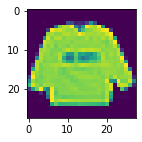

In [687]:
plt.figure(figsize = (2,2))
plt.imshow(train_data.iloc[0,1:].values.reshape(28,28))

In [688]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [689]:
model = Sequential()
model.add(Dense(units =6000,activation = 'relu',input_dim = 784)) #total parameters = (784*100)+100
model.add(Dense(units =1000,activation = 'relu',input_dim = 784))
#model.add(Dense(units =600,activation = 'relu',input_dim = 784))
model.add(Dense(units = 60,activation = 'softmax',name = 'output')) #total param= (100*20)+20
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 6000)                │       4,710,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1000)                │       6,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 60)                  │          60,060 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,771,060 (41.09 MB)

 Trainable params: 10,771,060 (41.09 MB)

 Non-trainable params: 0 (0.00 B)

In [690]:
len(model.weights)

6

In [691]:
model.weights[0].shape

TensorShape([784, 6000])

In [692]:
model.weights[1].shape

TensorShape([6000])

In [693]:
model.weights[2].shape

TensorShape([6000, 1000])

In [694]:
model.weights[3].shape

TensorShape([1000])

In [695]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]
print(X.shape,y.shape)

(60000, 784) (60000,)


In [696]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,batch_size = 500,epochs=20)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 237ms/step - accuracy: 0.5413 - loss: 217.9162
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 236ms/step - accuracy: 0.8329 - loss: 0.5911
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.8580 - loss: 0.4221
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 225ms/step - accuracy: 0.8665 - loss: 0.3840
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 227ms/step - accuracy: 0.8845 - loss: 0.3224
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.8895 - loss: 0.3027
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 225ms/step - accuracy: 0.8992 - loss: 0.2701
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 230ms/step - accuracy: 0.9094 - loss: 0.2542
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.9110 - loss: 0.2436
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 234ms/step - accuracy: 0.9129 - loss: 0.2367
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - accuracy: 0.9182 - loss: 0.2237
Epoch 12/20
120/1

In [724]:
test_data = pd.read_csv(r"C:\Users\HP\Downloads\vita\ML\fashion-mnist_test.csv")

In [729]:
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values
yhat= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [730]:
yhat.shape

(10000, 60)

In [731]:
X_test.shape

(10000, 784)

In [732]:
np.set_printoptions(suppress = True,precision = 2)
yhat[:3,:]

array([[0.85, 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.

In [733]:
ans = np.argmax(yhat,axis=1)
#print(ans)
ans.shape

(10000,)

In [734]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [735]:
print(accuracy_score(y_test,ans))

0.8918


In [736]:
print(confusion_matrix(y_test,ans))

[[874   2  14  23   0   0  76   0  11   0]
 [  2 982   2  12   0   1   1   0   0   0]
 [ 13   1 809   7  82   0  86   0   2   0]
 [ 21  10   6 898  38   1  23   0   3   0]
 [  7   1  67  14 837   0  73   0   1   0]
 [  0   0   0   0   0 951   0  29   3  17]
 [158   1  66  16  59   0 693   0   7   0]
 [  0   0   0   0   0  11   0 921   0  68]
 [  5   0   6   3   4   2   7   2 971   0]
 [  1   0   0   0   0   1   0  16   0 982]]


In [737]:
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.92      0.90      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.69      0.71      1000
           7       0.95      0.92      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [738]:
relu softmax =100,20  epochs = 150,20  Accuracy-0.85
epochs-150,20 accu-0.86
1000-400-10  acc 88
0.8908
`1000-600-60,1000-20 0.8921 ,0.8732

6000-600-60 ,1000-20 ,0.8899
6000-800-60,1000-20,.888
6000-1000-60, 8855
6000-1000-60,500-20 ,0.8937
6000-600-20,1000-20,0.887
1000-600-10 -0.87

SyntaxError: invalid syntax (Temp/ipykernel_12256/3639741543.py, line 1)